In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import datasets

In [2]:
hd=pd.read_excel("cleveland.xlsx")

In [3]:
X = hd.iloc[:, :13]
y = hd.iloc[:, 13]

y = y.replace(["negative", "positive"], [0, 1])

In [4]:
X_std=StandardScaler().fit_transform(X)

pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_std)

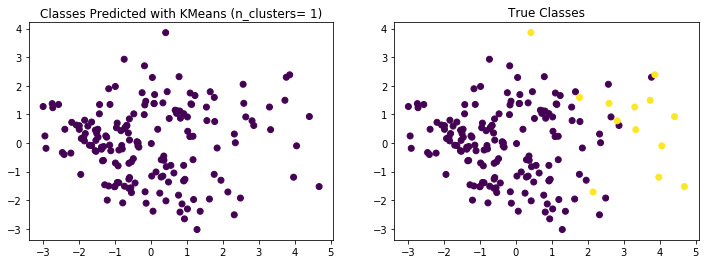

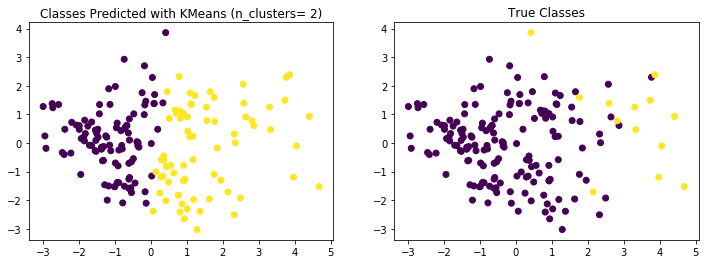

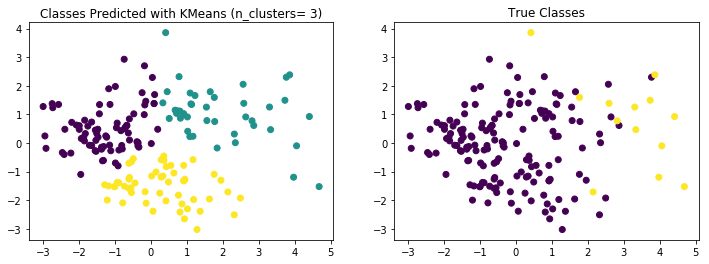

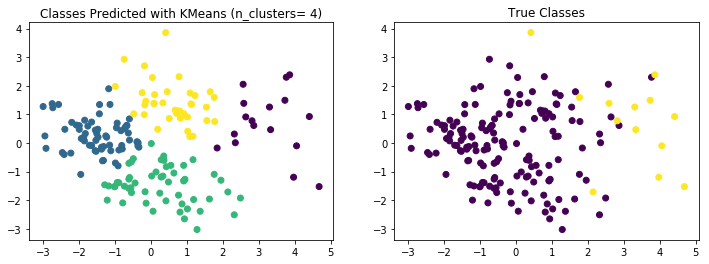

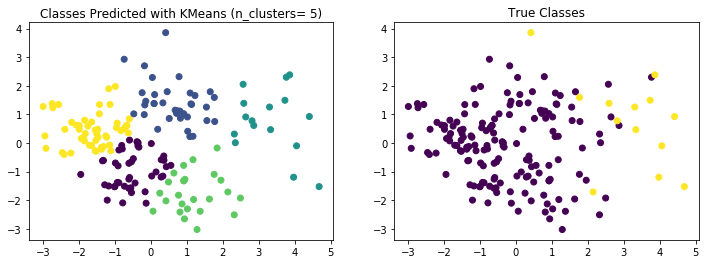

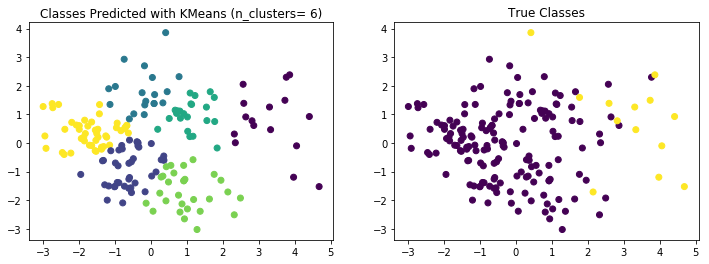

In [5]:
clusters=[1,2,3,4,5,6]

for i in clusters:
    km=KMeans(n_clusters=i)
    km.fit(pca_result)

    y_pred=km.predict(pca_result)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(pca_result[:,0], pca_result[:,1], c=y_pred)
    plt.title("Classes Predicted with KMeans (n_clusters= {})".format(i))
    plt.subplot(1,2,2)
    plt.scatter(pca_result[:,0], pca_result[:,1], c=y)
    plt.title("True Classes")
    plt.show()

En iyi sonuç; küme değerini "6" olarak ayarlayıp en sağdaki sınıf 1, geri kalanlar 0 olarak alındığında elde ediliyor. Ama, kümeleri önceden bilmediğimizi varsayarsak bu veri seti için etkin ve verimli bir yöntem değil.